# homework 7

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import scienceplots

plt.style.use(['science', 'grid', 'custom', 'vibrant'])

In [124]:
# find final weight vector for given input correlation


Q = np.array([[0.2, 0.1], [0.1, 0.3]])

eigenvalues, eigenvectors = np.linalg.eig(Q)

eigenvalues, eigenvectors

print(eigenvectors[:,1]*2)


[-1.05146222 -1.70130162]


In [115]:
# 2-D learning simulation

with open('resources/module 7/c10p1.pickle', 'rb') as f:
    data = pickle.load(f)
    
data = data['c10p1']

centred_data = data - np.mean(data, axis=0)

# centred_data = centred_data + np.array([0.1, -0.3])

# implementing Oja's rule

eta = 1  # learning rate
alpha = 1  # decay factor
dt = 0.01  # time step

w_i = np.array([0.5, 0.5])

for i in range(100000):
    index = i%len(data)
    u = centred_data[index]
    # calculate output firing-rate
    v = np.dot(u, w_i)
    # update rule
    w_i = w_i + dt * eta * (v * u - alpha * v**2 * w_i) # Oja's rule

print("Weight vector w_{i}: ", w_i)
print("\n")

# eigenvalues and eigenvectors of the correlation matrix

eigenvalues, eigenvectors = np.linalg.eig(np.cov(centred_data.T))
print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors[:,0].T, eigenvectors[:,1].T)

Weight vector w_{i}:  [ 0.70937641 -0.70502683]


Eigenvalues:  [0.58898438 0.06563702]
Eigenvectors:  [ 0.71033657 -0.70386217] [0.70386217 0.71033657]


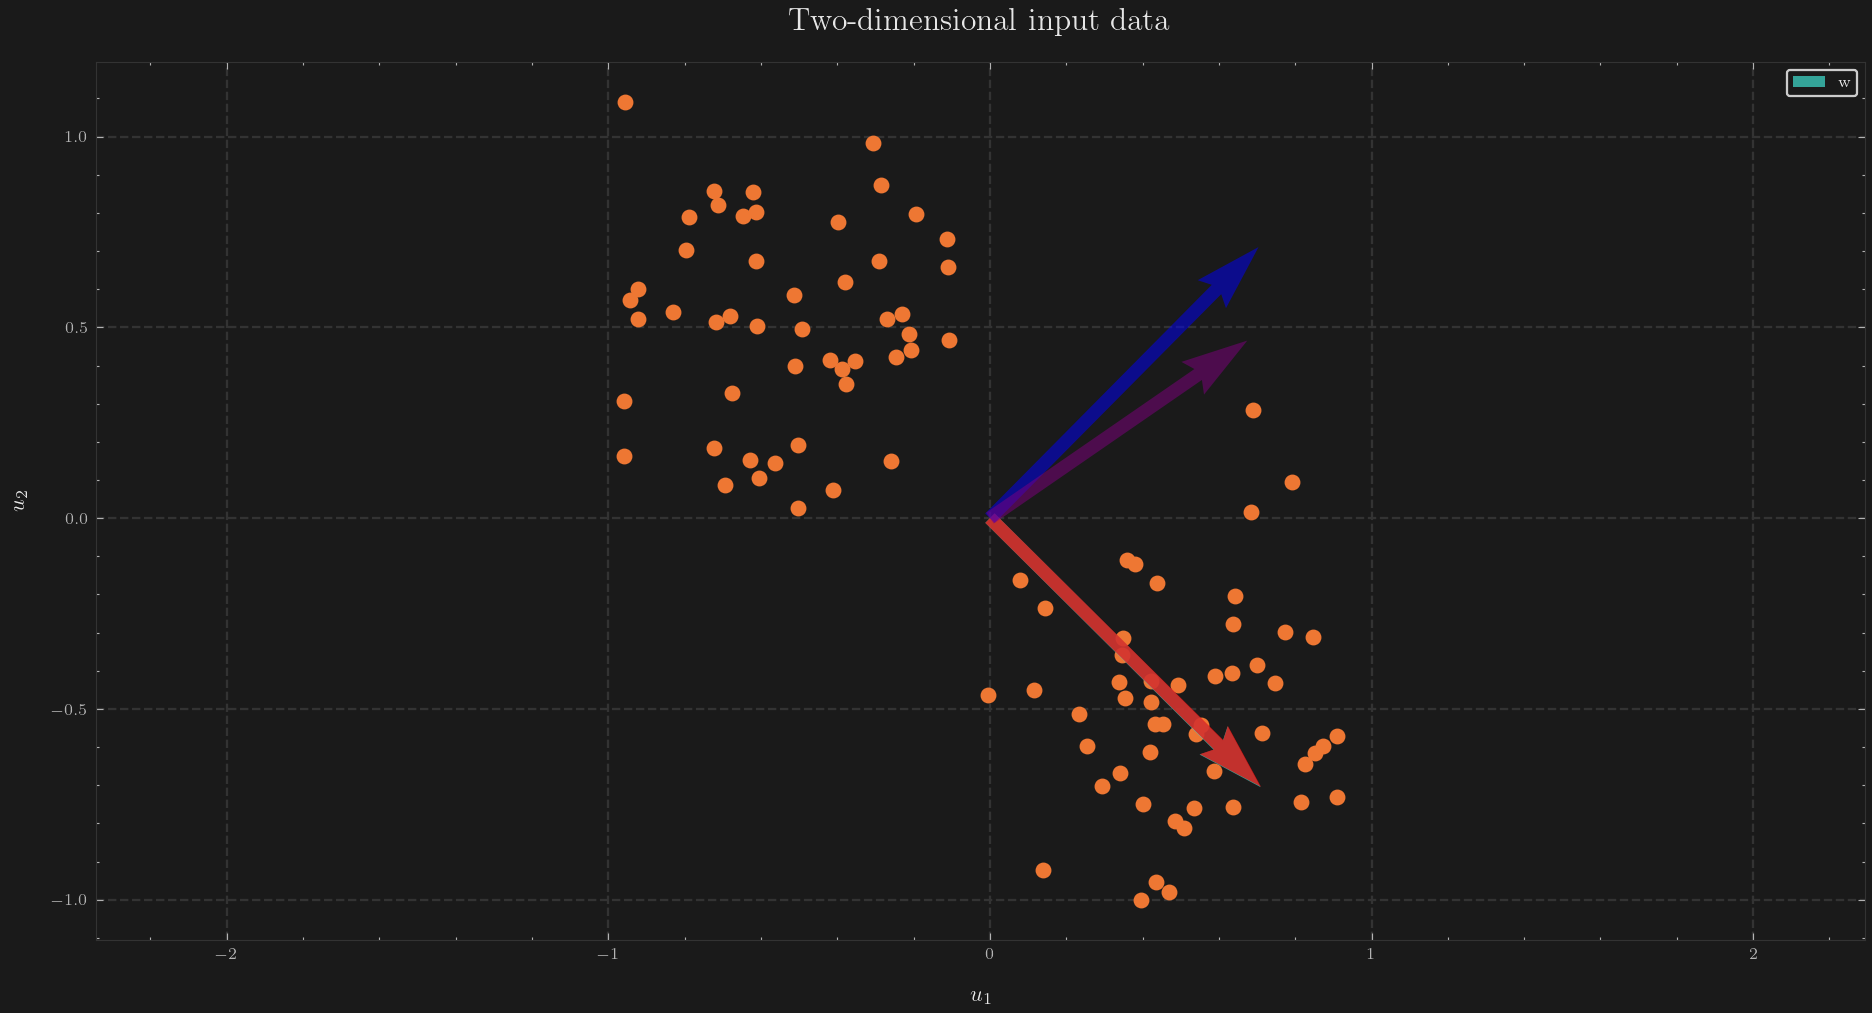

In [117]:
plt.figure(figsize=(14, 7), dpi=163)
plt.scatter(x = centred_data[:,0], y = centred_data[:,1])
plt.quiver(0, 0, w_i[0], w_i[1], angles='xy', scale_units='xy', scale=1, color='turquoise', alpha=0.7, label = 'w')
plt.quiver(0, 0, eigenvectors[0,0], eigenvectors[1,0], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.7)
plt.quiver(0, 0, eigenvectors[0,1], eigenvectors[1,1], angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5)
plt.quiver(0, 0, np.mean(data[0]), np.mean(data[1]), angles='xy', scale_units='xy', scale=1, color='purple', alpha=0.5)
plt.axis('equal')
plt.xlabel('$u_{1}$')
plt.ylabel('$u_{2}$')
plt.title('Two-dimensional input data')
plt.legend()